In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
X = iris.data

Y = iris.target

In [5]:
print iris.DESCR

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [7]:
iris_target = DataFrame(Y,columns=['Species'])

In [9]:
def flower(num):
    if num == 0:
        return 'Satosa'
    elif num ==1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [10]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [11]:
iris_target.head()

,Species
0,Satosa
1,Satosa
2,Satosa
3,Satosa
4,Satosa


In [12]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [13]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Satosa
1,4.9,3.0,1.4,0.2,Satosa
2,4.7,3.2,1.3,0.2,Satosa
3,4.6,3.1,1.5,0.2,Satosa
4,5.0,3.6,1.4,0.2,Satosa


C:\Users\swapn\Anaconda2\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


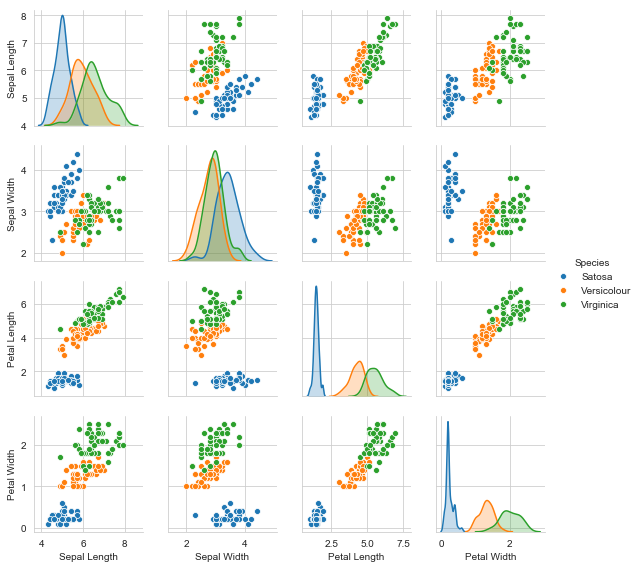

In [14]:
sns.pairplot(iris,hue='Species',size=2)

C:\Users\swapn\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\swapn\Anaconda2\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


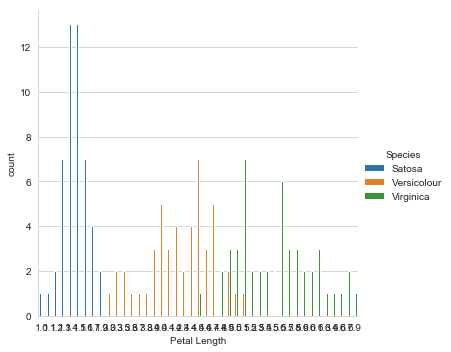

In [15]:
sns.factorplot('Petal Length',data=iris,hue='Species',kind='count',size=5)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
logreg = LogisticRegression()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)

In [18]:
logreg.fit(X_train,Y_train)

C:\Users\swapn\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\swapn\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
from sklearn import metrics

In [20]:
Y_pred =  logreg.predict(X_test)

In [21]:
print metrics.accuracy_score(Y_test,Y_pred)

0.9333333333333333


In [22]:
#K nears neighbors model

from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [24]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [25]:
Y_pred =  knn.predict(X_test)

In [26]:
print metrics.accuracy_score(Y_test,Y_pred)

0.95


In [27]:
knn = KNeighborsClassifier(n_neighbors=1)

In [28]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [29]:
Y_pred = knn.predict(X_test)

In [30]:
print metrics.accuracy_score(Y_test,Y_pred)

0.9666666666666667


In [31]:
k_range = range(1,21)

accuracy = []

In [32]:
for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0,0.5,'Testing Accuracy')

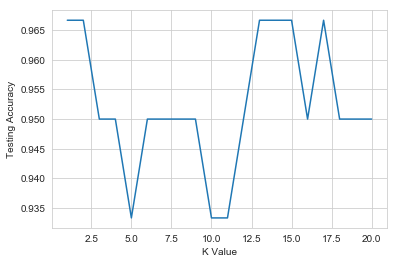

In [33]:
plt.plot(k_range,accuracy)
plt.xlabel('K Value')
plt.ylabel('Testing Accuracy')